In [1]:
import numpy as np 
import matplotlib.pylab as plt
from getdist import plots, MCSamples
import getdist
import pandas as pd
import sys
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# our script
import utils.helpers as hp

fontSize = 20

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})

settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3}
np.set_printoptions(precision=3)

In [10]:
sample_name = 'second_200'

In [11]:
samples_emcee = hp.read_list('../samples', 'emulator_'+sample_name+'_1')

In [12]:
samples_emu = hp.read_list('../samples', 'emulator_'+sample_name+'_2')

In [13]:
samples_emcee.flatlnprobability

array([-0.331,  2.665,  2.388, ..., -1.589,  0.328, -0.421])

In [14]:
samples_emu.flatlnprobability

array([-5.857,  0.731,  0.225, ...,  0.694,  2.713,  0.951])

In [15]:
burnin  = 0
ndim     = 6
names    = ["x%s"%i for i in range(ndim)]
labels   =  [r'$\Omega_{m}$', r'$w_{0}$', r'$M_{B}$', r'$\delta M$', r'$\alpha$', r'$\beta$']

samples_emcee = samples_emcee.chain[:, burnin:, :].reshape((-1, ndim))
cut_samps = samples_emcee[samples_emcee[:,0]>=0.0,:]
samples1= MCSamples(samples=cut_samps, names = names, labels = labels, ranges={'x0':(0.0, None), 'x4':(0.05, 0.15)}, settings=settings, label='First MCMC Run')

Removed no burn in


In [16]:
samples_emu = samples_emu.chain[:, burnin:, :].reshape((-1, ndim))
cut_samps = samples_emu[samples_emu[:,0]>=0.0,:]
samples2= MCSamples(samples=cut_samps, names = names, labels = labels, ranges={'x0':(0.0, None), 'x4':(0.05, 0.15)}, settings=settings, label='Second MCMC Run')

Removed no burn in


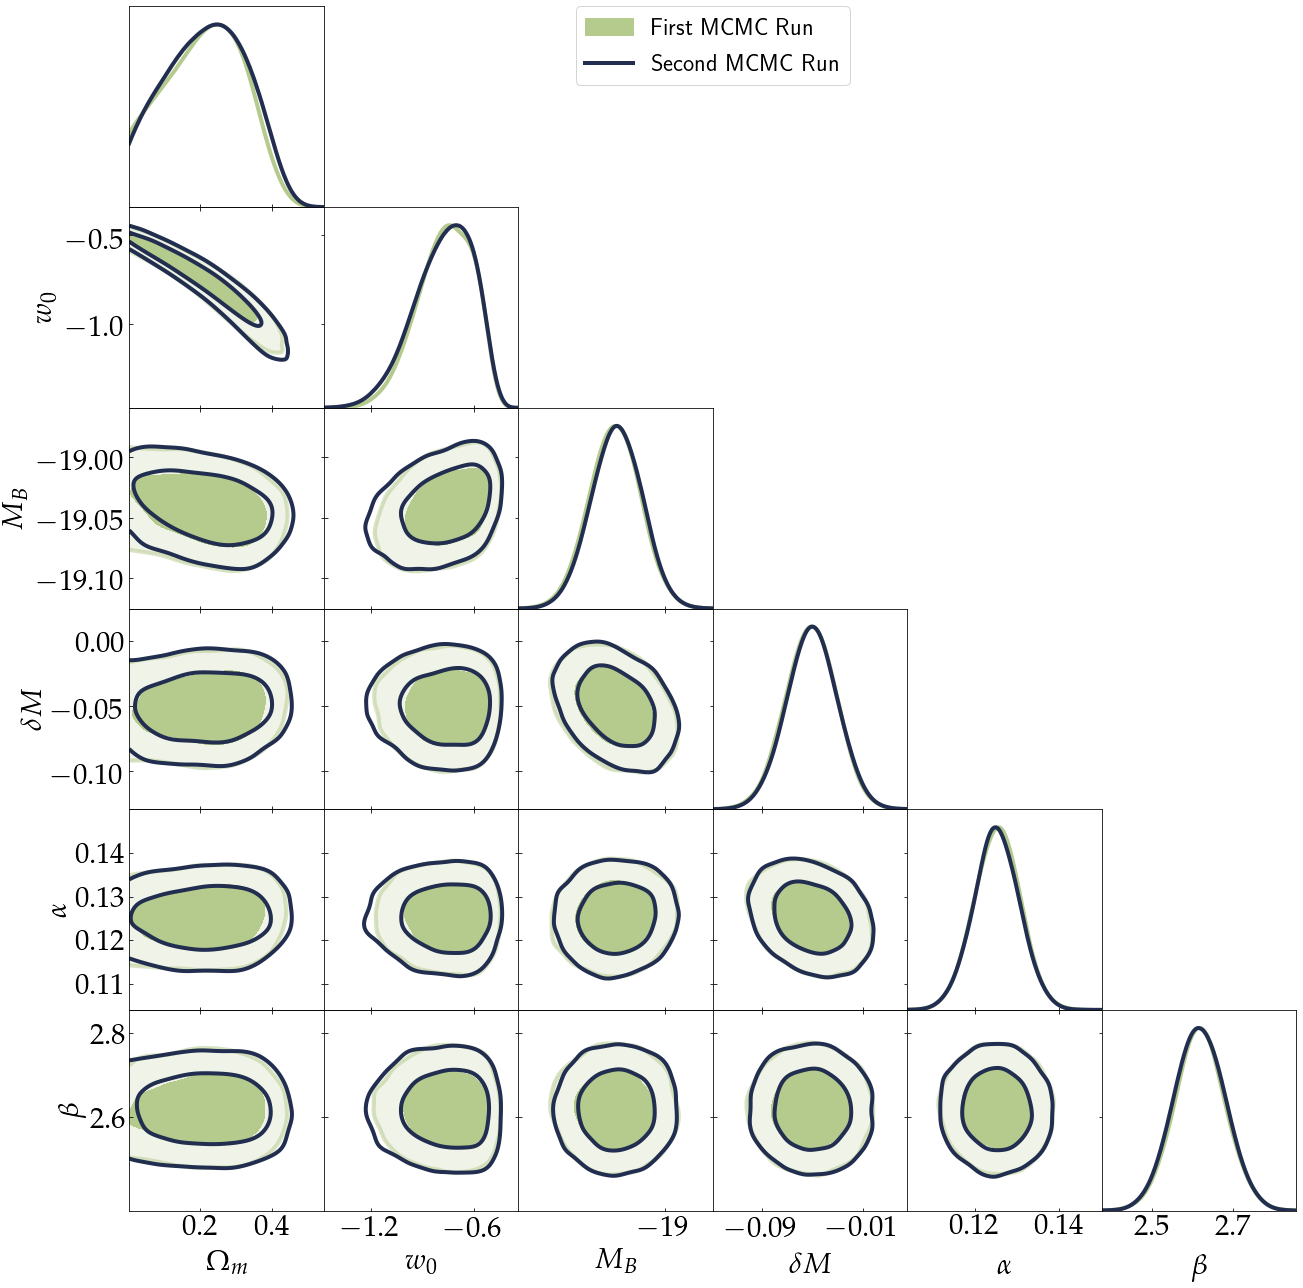

In [17]:
c1 = '#B5CA8D'
c3 = '#222E50'
alpha = 0.7
contours = np.array([0.68,0.95])

G = plots.getSubplotPlotter(subplot_size=3)
G.settings.solid_contour_palefactor = 0.8
G.settings.alpha_filled_add = alpha
G.settings.num_plot_contours = 2
G.settings.lw_contour = 5
G.settings.axes_fontsize = 30
G.settings.lab_fontsize = 30
G.settings.fontsize = 35 # important for padding in x-axis 
G.settings.legend_fontsize = 25
samples1.updateSettings({'contours': [0.68, 0.95]})
samples2.updateSettings({'contours': [0.68, 0.95]})
G.triangle_plot([samples1, samples2], filled = [True, False], contour_colors=[c1, c3], contour_lws=[4, 4], contour_ls=['-', '-'])
# plt.savefig('plots/triangle_plot_'+sample_name+'.pdf', transparent = False, bbox_inches = 'tight') 
plt.show()